<a href="https://colab.research.google.com/github/RajeswariSahu/Data-Science-Projects/blob/main/PRCP_1016_HeartDieseasePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



  ##     PRCP-1016- Heart Diesease Prediction






Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.


In [ ]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
data=pd.read_csv('heart disease dataset.csv')
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


# Domain Analysis


The dataset consists of 180 individuals data. There are 14 columns in the dataset, which are described below.

a. patient_id : shows the patient id.

b. slope_of_peak_exercise_st_segment:
1 = upsloping
2 = flat
3 = downsloping

c. Thal : displays the thalassemia :
normal, fixed defect, reversible defect

d. resting_blood_pressure: displays the resting blood pressure value of an individual in mmHg (unit)

e. chest_pain_type: displays the type of chest-pain experienced by the individual using the following format :
1 = typical angina
2 = atypical angina
3 = non — anginal pain
4 = asymptomatic

f. num_major_vessels (0–3) colored by flourosopy : displays the value as integer.

g. fasting_blood_sugar_gt_120_mg_per_dl: compares the fasting blood sugar value of an individual with 120mg/dl.

If fasting blood sugar > 120mg/dl then : 1 (true)
else : 0 (false)

h. resting_ecg_results : displays resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality
2 = left ventricular hyperthrophy

i. serum_cholesterol_mg_per_dl :displays the serum cholesterol in mg/dl (unit)

j. oldpeak_eq_st_depression

k. sex: displays the gender of the individual using the following format :
1 = male
0 = female

l. age: displays the age of the individual.

m. max_heart_rate_achieved : displays the max heart rate achieved by an individual.

n. exercise_induced_angina :
1 = yes
0 = no


# Basic Checks

In [ ]:
data.shape    # check no.of rows and columns

(180, 14)

In [ ]:
data.rename(columns={'exercise_induced_angina': 'target'}, inplace=True)    # rename the column name

•	0 represents no heart disease present

•	1 represents heart disease present


In [ ]:
data.rename(columns={'resting_ekg_results': 'resting_ecg_results'}, inplace=True)   # just do the correction because it was spelling mistake

In [ ]:
data.columns     # checks name of all columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ecg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'target'],
      dtype='object')

In [ ]:
data.head()    # show first five rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
data.tail()    # show last five rows

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


In [ ]:
data.dtypes     # check datatype of all columns

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ecg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
target                                    int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ecg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [ ]:
data.describe()    # shows statistical report

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [ ]:
data.describe(include='O')     # shows statistical report of object datatype

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [ ]:
data.isnull().sum()    # check number of null value

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ecg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
target                                  0
dtype: int64

In [ ]:
data.duplicated().sum()    # check duplicate values

0

In [ ]:
# check no.of categories and value counts of categorical columns
x=['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ecg_results','sex','target']
for i in x:
  print(i,data[i].unique())
  print('**********************')
  print(i, data[i].value_counts())
  print('-----------------------')

slope_of_peak_exercise_st_segment [1 2 3]
**********************
slope_of_peak_exercise_st_segment 1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64
-----------------------
thal ['normal' 'reversible_defect' 'fixed_defect']
**********************
thal normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64
-----------------------
chest_pain_type [2 3 4 1]
**********************
chest_pain_type 4    82
3    57
2    28
1    13
Name: chest_pain_type, dtype: int64
-----------------------
num_major_vessels [0 3 2 1]
**********************
num_major_vessels 0    106
1     37
2     23
3     14
Name: num_major_vessels, dtype: int64
-----------------------
fasting_blood_sugar_gt_120_mg_per_dl [0 1]
**********************
fasting_blood_sugar_gt_120_mg_per_dl 0    151
1     29
Name: fasting_blood_sugar_gt_120_mg_per_dl, dtype: int64
-----------------------
resting_ecg_results [2 0 1]
**********************
resting_ecg_results 2 

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 66.2 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html('my_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights

From the sweetviz report,what we have analyze is given below


1. slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
*   As we can see in the graph,there are three distinct type of blood is flowing to the heart.52% patient have type 1 blood flow i.e upsloping.42% is type 2 which is flat and 7% is type 3 i.e downsloping.

2. thal (type: categorical): A thallium stress test is an imaging test that indicates how well blood flows into your heart while you are exercising or at rest. It’s also called a nuclear stress test.
*  As we can see in the graph,in this column there are three values which are normal,reversible_defect,fixed_defect.54% patients have normal blood flows.41% have reversible_defect.4% patients have fixed_defect.
3. resting_blood_pressure : In general, a normal blood pressure ranges between less than 120 mm Hg systolic — which is the pressure as your heart beats — and less than 80 mm Hg diastolic — which is the pressure as your heart relaxes. For your resting heart rate, the target is between 60 and 100 beats per minute (BPM)

*  The graph shows that bp range of 120-140 values are most common.
4.	chest_pain_type :Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.

 There are four types of chest pain.1-typical angina, which is chest pain caused by blockages in the blood vessels leading to your heart.2-atypical angina,3-non-anginal pain,4-asymptomatic.

*  In this dataset, 46% patients have type 4 chest pain i.e asymptomatic. 32% have type 3. 16% have type 2 and 7% have type 1 i.e typical angina which means least patient faced blockage in the blood vessels.

5. num_major_vessels : There are four distinct type of vessels. 59% are type 0,21% are type 1. 13% are type 2 and 8% are type 3.

6. fasting_blood_sugar_gt_120_mg_per_dl : Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.

*   fasting blood sugar > 120 mg/dl- (1 = true; 0 = false)
A fasting blood sugar level less than 100 mg/dL is normal. From 100 to 120 mg is considered
prediabetes. If it is 125 mg/dL or higher on two separate tests, you have diabetes.


*  The graph shows that 84% patients have 0 value which indicate that patients have no diabetes. only 16% patients have diabetes.

7. resting_ecg_results : 52% are type 2 and 47% are type 0.

8. serum_cholesterol_mg_per_dl : A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.

*  200-300 are most common values.
9. sex : Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.

*  69% patients are male and 31% are female
10. age : Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.

45-65 age are most common age of patient in the dataset
11. max_heart_rate_achieved : The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.

*  140-180 are common values.
12. exercise_induced_angina(target) : The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands


*  The graph shows that 68% patients do not have heart disease and only 32% patients have heart disease.

















# Bivariate Analysis

In [ ]:
cate_col=data[['slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ecg_results','sex','target']]
cate_col

,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,sex,target
0,1,normal,2,0,0,2,1,0
1,2,normal,3,0,0,0,0,0
2,1,normal,4,3,0,2,1,1
3,1,reversible_defect,4,0,0,0,1,0
4,3,reversible_defect,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...
175,2,reversible_defect,4,2,1,0,1,0
176,2,normal,4,0,0,1,0,1
177,2,reversible_defect,3,0,0,0,1,1
178,1,normal,3,2,1,0,1,0


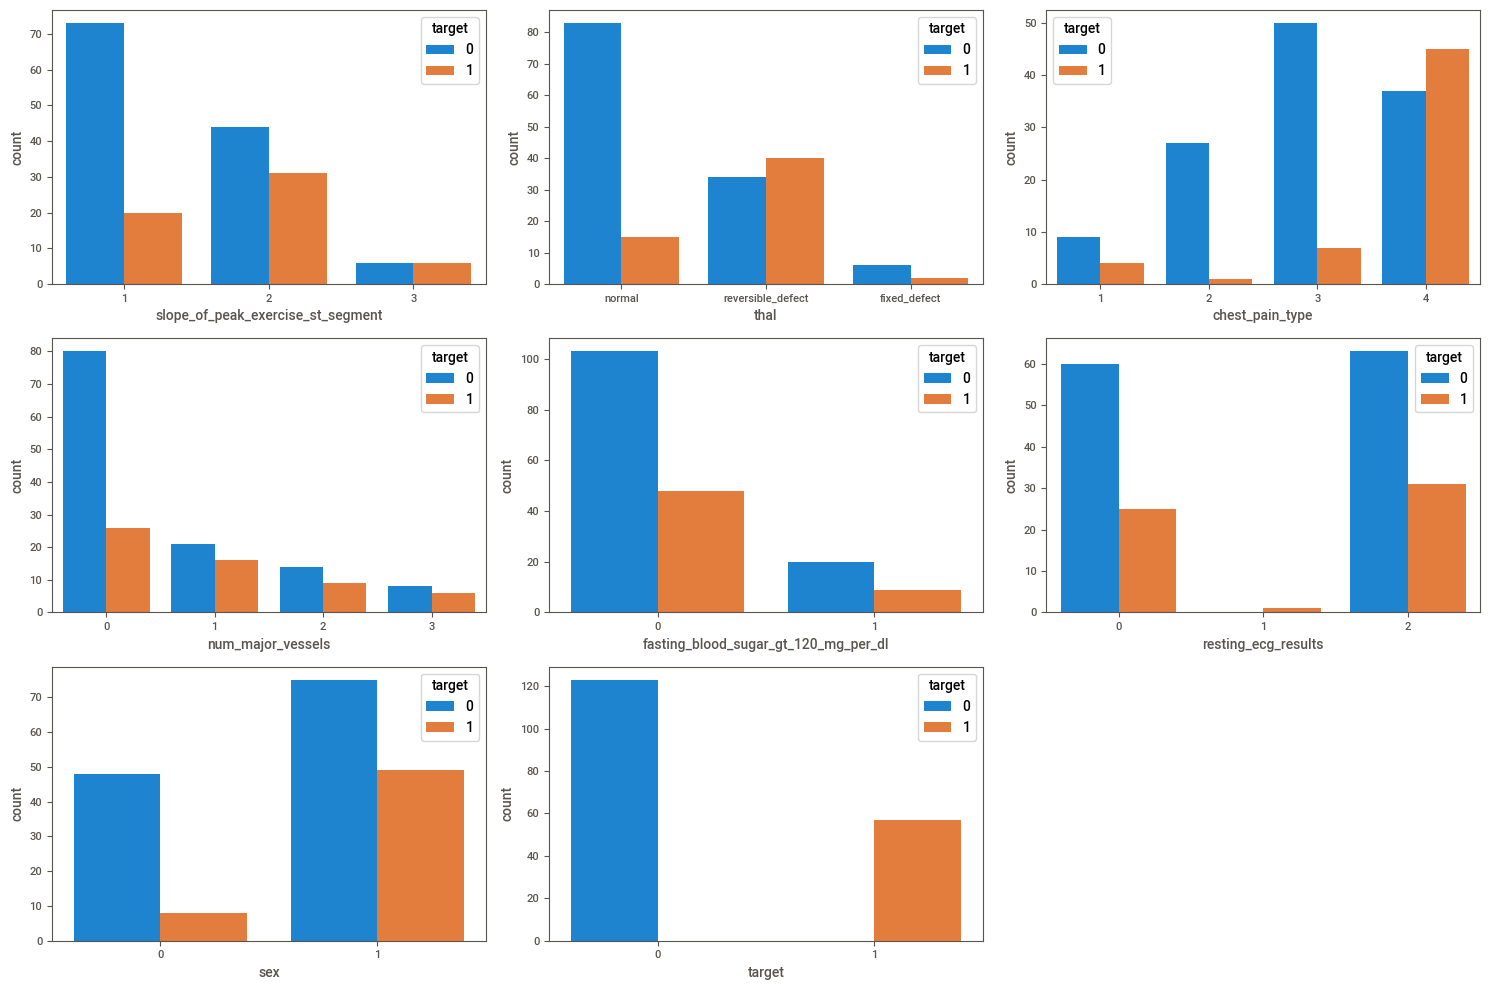

In [ ]:
plt.figure(figsize=(15,10),facecolor='white')
plotnum=1
for column in cate_col:
  if plotnum<=9:
    ax=plt.subplot(3,3,plotnum)
    sns.countplot(x=cate_col[column],data=cate_col,hue='target')
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnum+=1
plt.tight_layout()

# Insights

What we have analyzed in bivariate analysis is given below

1. slope_of_peak_exercise_st_segment : When it is flat which is coded as 2,the chance of heart attack is high.When it is upsloping which is coded as 1,then there is no chance of heart attack.
2. thal : There is high chance of heart attack when patients have faced reversible defect thallium stress.
3. chest_pain_type : The count plot shows that there is high chance of getting heart attack when the chest pain is asymptomatic.

*  Having a silent heart attack increases the risk of having another heart attack, which could be deadly. Having another heart attack also increases the risk of complications, such as heart failure. There are no tests to determine the potential for having a silent heart attack.
4. num_major_vessels : The graph shows that type 0 and 1 have more chance of getting heart attack.
5. fasting_blood_sugar_gt_120_mg_per_dl :  Patients who have no diabetes are facing heart attack than those who have diabetic.
6. resting_ecg_results : Patients having type 2 resting ecg are facing heart attack.
7. sex : The above graph clearly shows that male patients are more than female patients who are facing heart attack.



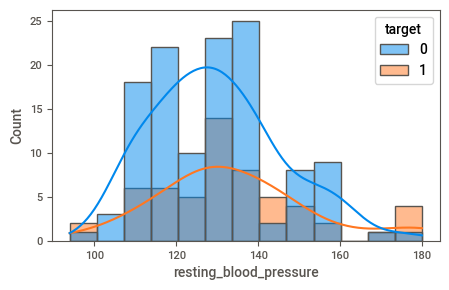

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='resting_blood_pressure',kde=True,hue='target')
plt.show()

# Insights

*   The above histplot shows that when resting bloodpressure is increasing,there is a chance of heart attack.



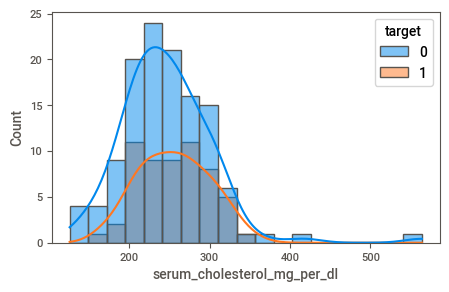

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='serum_cholesterol_mg_per_dl',hue='target',kde=True)
plt.show()

# Insights

*  The above graph shows that there is no impact of serum cholesterol on heart attack of patients.



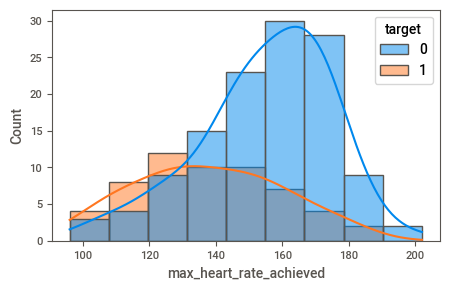

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='max_heart_rate_achieved',kde=True,hue='target')
plt.show()

# Insight

*  When the heart rate is in 100-130,there is a chance of heart attack.When it is in 140-200, there is no chance of heart attack.



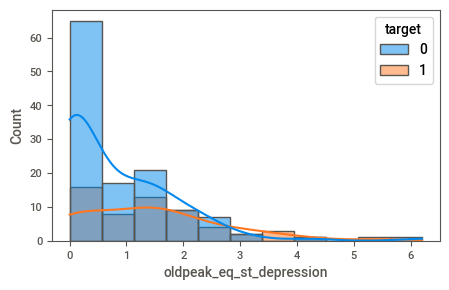

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='oldpeak_eq_st_depression',kde=True,hue='target')
plt.show()

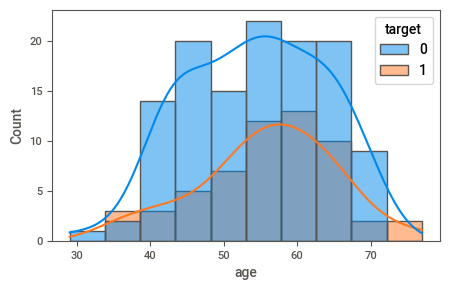

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='age',kde=True,hue='target')
plt.show()

# Insight


* When the age is nearly 35-40 years,there is a chance of heart attack.From the graph,it is clearly seen that age above 70 have heart attack.If the age is between 40 to 70,there is very less chance of heart attack.



# Multivariate Analysis

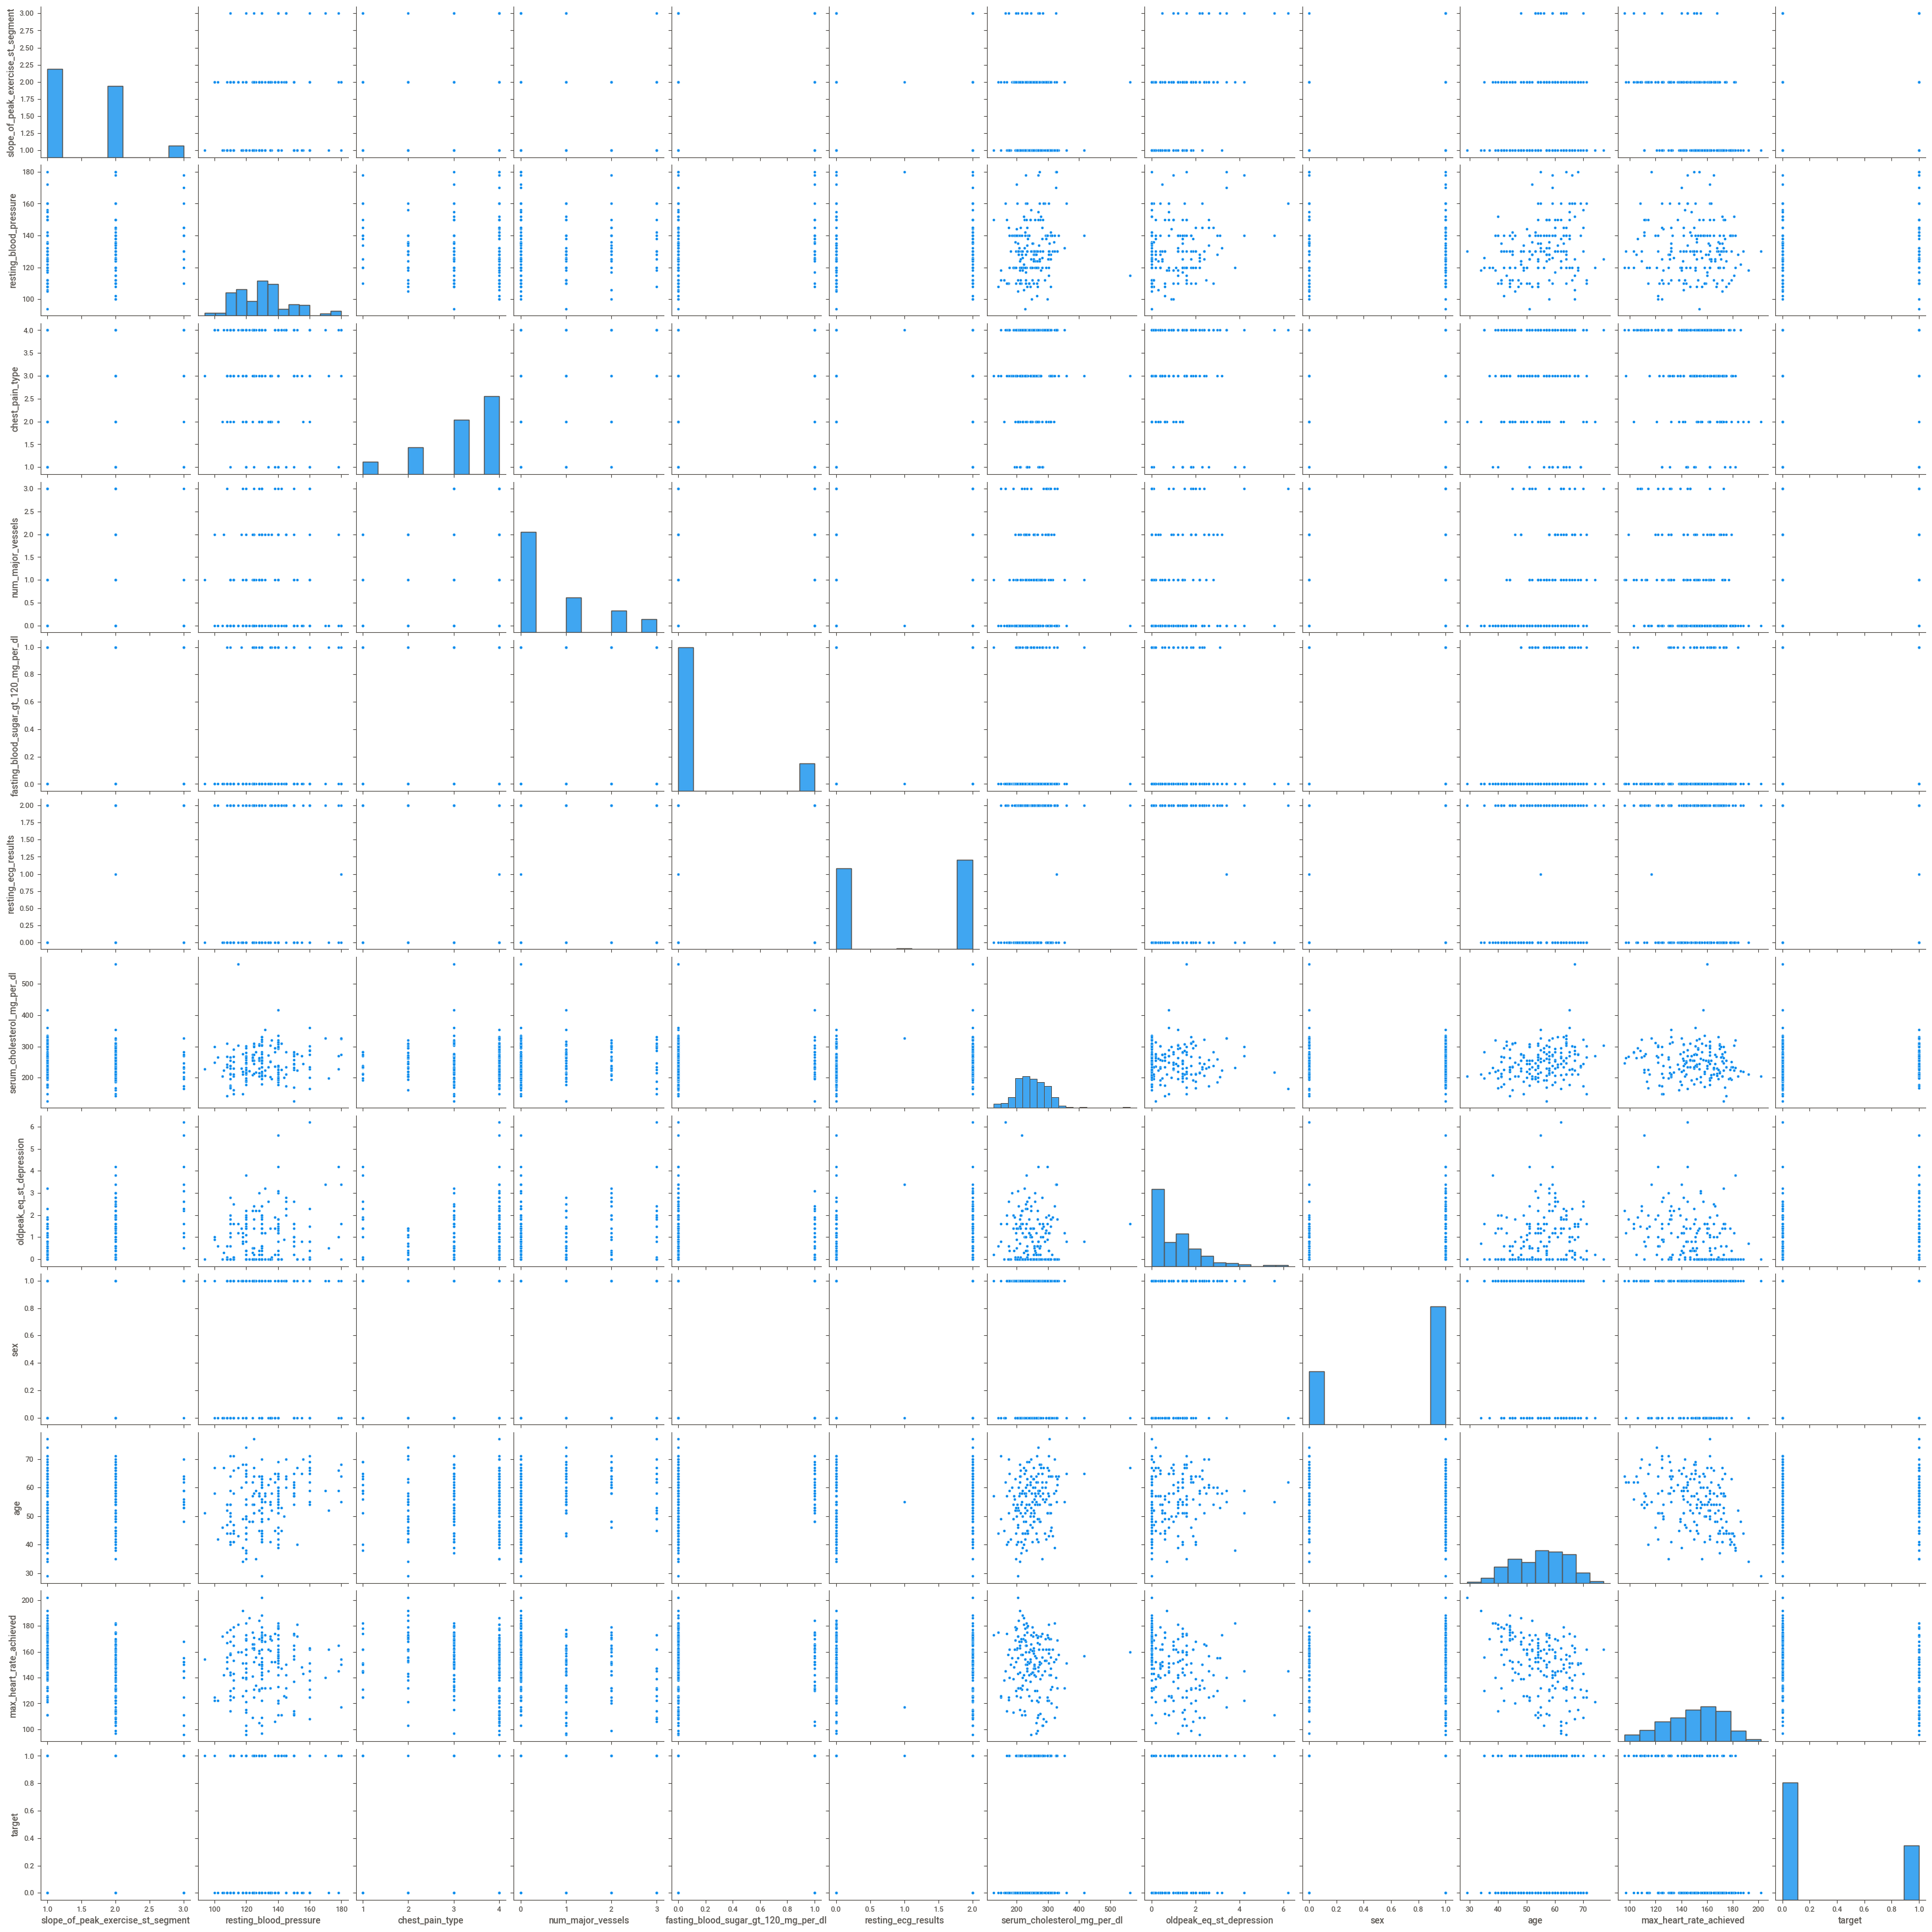

In [ ]:
sns.pairplot(data=data)

# Data Preprocessing

In [ ]:
# check for missing values
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ecg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
target                                  0
dtype: int64

In [ ]:
# check for duplicate
data.duplicated().sum()

0

In [ ]:
data.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

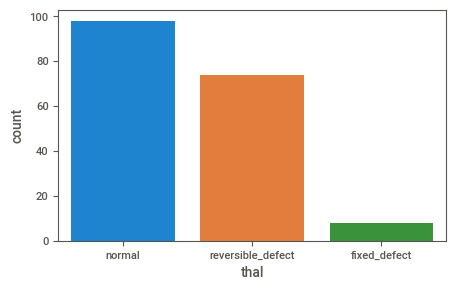

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(data=data,x='thal')
plt.show()

In [ ]:
# converting categorical data to numerical data
data.thal=data.thal.map({'normal':2,'reversible_defect':1,'fixed_defect':0})

In [ ]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
0,0z64un,1,2,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,2,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,2,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0


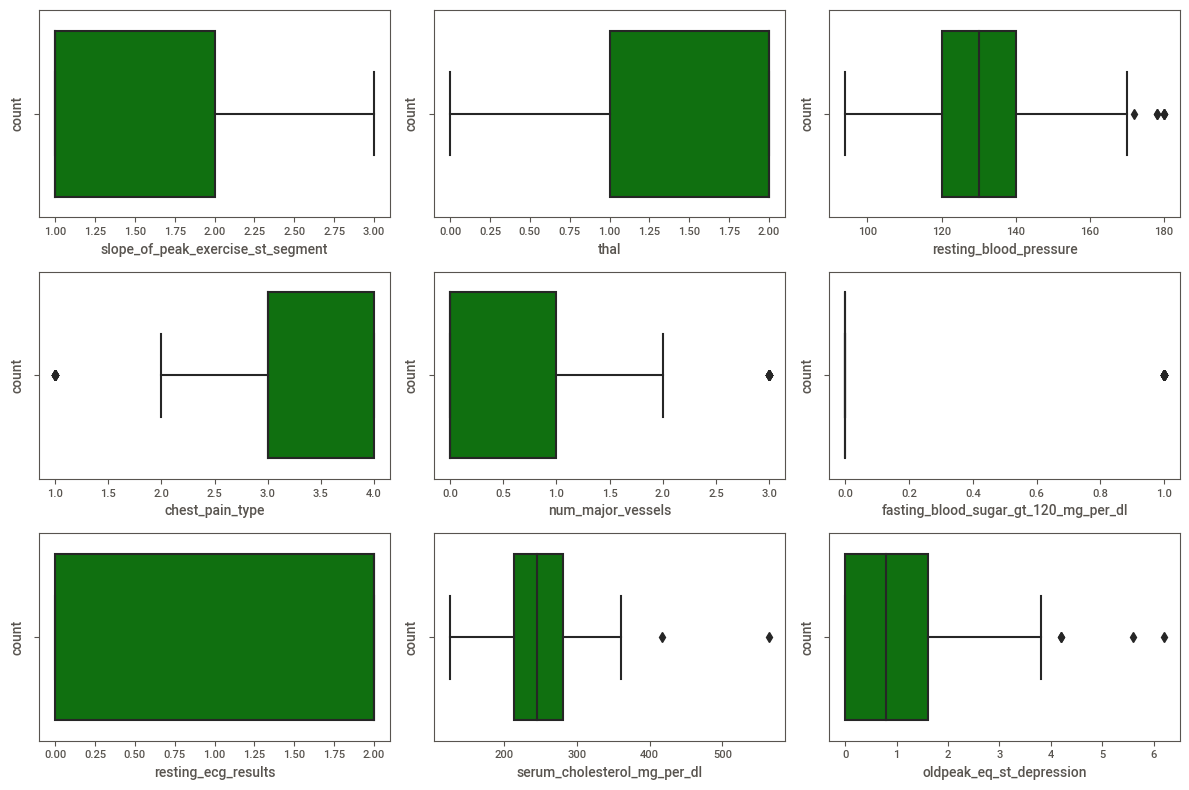

In [ ]:
# check ouliers
plt.figure(figsize=(12,8),facecolor='white')
plotnum=1
for column in data.drop('patient_id',axis=1):
  if plotnum<=9:
    ax=plt.subplot(3,3,plotnum)
    sns.boxplot(x=data[column],data=data,color="green")
    plt.xlabel(column,fontsize=10)
    plt.ylabel('count',fontsize=10)
  plotnum+=1
plt.tight_layout()

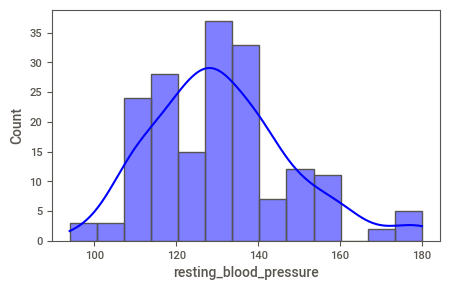

In [ ]:
# check the distribution of resting_blood_pressure
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='resting_blood_pressure',kde=True,color='blue')
plt.show()

Clearly we see outliers in resting_blood_pressure column and distribution of resting_blood_pressure is skewed.So we will use IQR method to identify the outliers.

Replace outliers with median since data is not normal.

In [ ]:
# Handle outliers of resting_blood_pressure column
## Find Q1 and Q3
Q1=data['resting_blood_pressure'].quantile(0.25)
Q3=data['resting_blood_pressure'].quantile(0.75)
print('lower quartile',Q1)
print('upper quartile',Q3)


lower quartile 120.0
upper quartile 140.0


In [ ]:
## find IQR
IQR=Q3-Q1
IQR

20.0

Find values less than lower limit

Find values greater than upper limit






In [ ]:
## find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 90.0
upper limit is 170.0


In [ ]:
## find values above upper limit
data.loc[data['resting_blood_pressure']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
4,oyt4ek,3,1,178,1,0,0,2,270,4.2,1,59,145,0
33,0n5fu0,1,2,180,4,0,0,0,325,0.0,0,64,154,1
72,qwj1yf,1,1,172,3,0,1,0,199,0.5,1,52,162,0
75,4v0q7o,2,1,178,4,2,1,0,228,1.0,0,66,165,1
113,sqddbc,2,1,180,3,0,1,2,274,1.6,1,68,150,1
176,2s2b1f,2,2,180,4,0,0,1,327,3.4,0,55,117,1


In [ ]:
## find values below lower limit
data.loc[data['resting_blood_pressure']<lower_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target


In [ ]:
## find percentage of outliers
len(data.loc[data['resting_blood_pressure']>upper_limit])/len(data)*100

3.3333333333333335

In [ ]:
## how to handle outliers
## since data is not normal,we will replace outliers with median
data.loc[data['resting_blood_pressure']>upper_limit,'resting_blood_pressure']=data['resting_blood_pressure'].median()

<Axes: xlabel='resting_blood_pressure'>

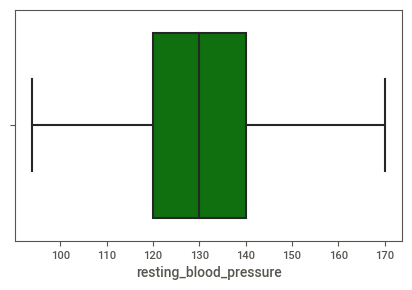

In [ ]:
## check ,are there any outliers in resting_blood_pressure
plt.figure(figsize=(5,3))
sns.boxplot(x=data.resting_blood_pressure,color='green')

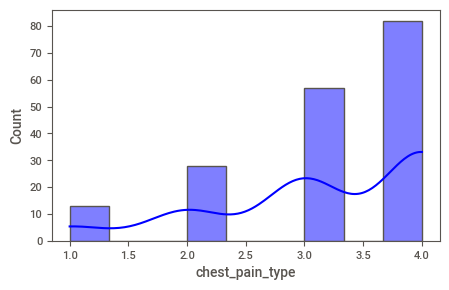

In [ ]:
# check distribution of chest_pain_type
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='chest_pain_type',kde=True,color='blue')
plt.show()

Clearly we see outliers in chest_pain_type column and distribution of chest_pain_type is not normal.So we will use IQR method to identify the outliers.

Replace outliers with median since data is not normal.

In [ ]:
# Handle outliers of chest_pain_type column
## Find Q1 and Q3
Q1=data['chest_pain_type'].quantile(0.25)
Q3=data['chest_pain_type'].quantile(0.75)
print('lower quartile',Q1)
print('upper quartile',Q3)


lower quartile 3.0
upper quartile 4.0


In [ ]:
## find IQR
IQR=Q3-Q1
IQR

1.0

In [ ]:
## find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 1.5
upper limit is 5.5


In [ ]:
## find values below lower limit
data.loc[data['chest_pain_type']<lower_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
4,oyt4ek,3,1,130,1,0,0,2,270,4.2,1,59,145,0
14,f06u72,2,1,120,1,0,0,0,231,3.8,1,38,182,1
97,z5g5p3,2,2,160,1,1,1,2,234,0.1,1,69,131,0
99,bthqr4,1,2,150,1,0,1,2,283,1.0,0,58,162,0
108,e68djo,1,2,125,1,1,0,2,213,1.4,1,51,125,1
120,ju1wdc,2,2,138,1,1,1,2,282,1.4,1,65,174,0
141,471q03,2,1,120,1,0,0,2,193,1.9,1,56,162,0
146,z8yl4y,1,1,140,1,0,0,0,199,1.4,1,40,178,1
147,mxabaz,2,2,134,1,2,0,0,234,2.6,1,61,145,0
155,fz84ac,1,2,160,1,0,0,2,273,0.0,1,59,125,0


In [ ]:
## find values above upper limit
data.loc[data['chest_pain_type']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target


In [ ]:
## find percentage of outliers
len(data.loc[data['chest_pain_type']<lower_limit])/len(data)*100

7.222222222222221

In [ ]:
## how to handle outliers
## since data is not normal,we will replace outliers with median
data.loc[data['chest_pain_type']<lower_limit,'chest_pain_type']=data['chest_pain_type'].median()

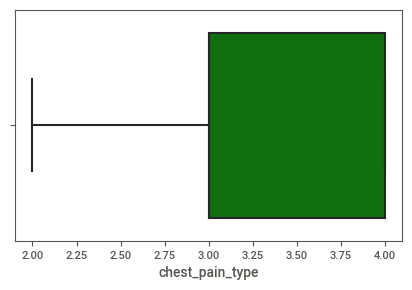

In [ ]:
## check ,are there any outliers in chest_pain_type
plt.figure(figsize=(5,3))
sns.boxplot(x=data.chest_pain_type,color='green')
plt.show()

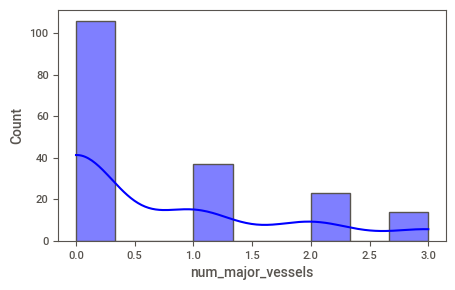

In [ ]:
# check distribution of num_major_vessels
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='num_major_vessels',kde=True,color='blue')
plt.show()

Clearly we see outliers in num_major_vessels and distribution of num_major_vessels is not normal.So we will use IQR method to identify the outliers.

Replace outliers with median since data is not normal.

In [ ]:
# Handle outliers of num_major_vessels column
## Find Q1 and Q3
Q1=data['num_major_vessels'].quantile(0.25)
Q3=data['num_major_vessels'].quantile(0.75)
print('lower quartile',Q1)
print('upper quartile',Q3)

lower quartile 0.0
upper quartile 1.0


In [ ]:
## find IQR
IQR=Q3-Q1
IQR

1.0

In [ ]:
## find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -1.5
upper limit is 2.5


In [ ]:
## find values above upper limit
data.loc[data['num_major_vessels']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
2,yt1s1x,1,2,125,4,3,0,2,304,0.0,1,77,162,1
21,k8899q,1,1,108,4,3,1,0,233,0.1,1,52,147,0
31,z7xkou,2,1,150,4,3,0,2,225,1.0,0,65,114,0
52,r7y4i1,1,1,130,4,3,1,2,330,1.8,1,63,132,1
66,m6zksp,2,2,130,4,3,0,2,322,2.4,1,70,109,0
69,mcwqgs,2,1,120,3,3,0,0,188,2.0,1,49,139,0
85,hfp05i,1,2,118,3,3,0,2,149,0.8,1,49,126,0
112,6r9x2j,2,1,140,4,3,0,0,298,4.2,1,51,122,1
119,1jruhz,2,2,138,4,3,1,0,294,1.9,0,62,106,0
123,6jcc1y,1,2,130,3,3,1,2,246,0.0,1,53,173,0


In [ ]:
## find values below lower limit
data.loc[data['num_major_vessels']<lower_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target


In [ ]:
## find percentage of outliers
len(data.loc[data['num_major_vessels']>upper_limit])/len(data)*100

7.777777777777778

In [ ]:
## how to handle outliers
## since data is not normal,we will replace outliers with median
data.loc[data['num_major_vessels']>upper_limit,'num_major_vessels']=data['num_major_vessels'].median()

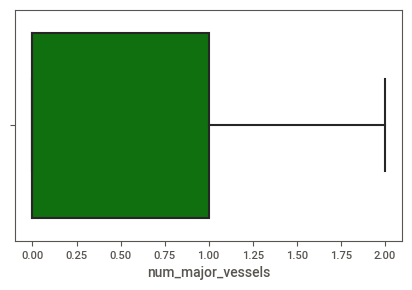

In [ ]:
## check ,are there any outliers in num_major_vessels
plt.figure(figsize=(5,3))
sns.boxplot(x=data.num_major_vessels,color='green')
plt.show()

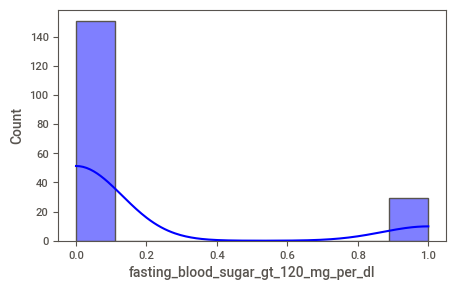

In [ ]:
# check distribution of fasting_blood_sugar_gt_120_mg_per_dl
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='fasting_blood_sugar_gt_120_mg_per_dl',kde=True,color='blue')
plt.show()

Clearly we see outliers in fasting_blood_sugar_gt_120_mg_per_dl and distribution of fasting_blood_sugar_gt_120_mg_per_dl  is not normal.So we will use IQR method to identify the outliers.

Replace outliers with median since data is not normal.

In [ ]:
# Handle outliers of fasting_blood_sugar_gt_120_mg_per_dl
## Find Q1 and Q3
Q1=data['fasting_blood_sugar_gt_120_mg_per_dl'].quantile(0.25)
Q3=data['fasting_blood_sugar_gt_120_mg_per_dl'].quantile(0.75)
print('lower quartile',Q1)
print('upper quartile',Q3)

lower quartile 0.0
upper quartile 0.0


In [ ]:
## find IQR
IQR=Q3-Q1
IQR

0.0

In [ ]:
## find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is 0.0
upper limit is 0.0


In [ ]:
## find percentage of outliers
len(data.loc[data['fasting_blood_sugar_gt_120_mg_per_dl']>upper_limit])/len(data)*100

16.11111111111111

Since the percentage of outliers is more than 10 percent,there is no need to handle outliers.We have to keep it as it is.

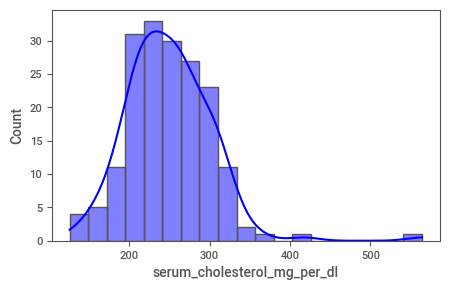

In [ ]:
# check distribution of serum_cholesterol_mg_per_dl
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='serum_cholesterol_mg_per_dl',kde=True,color='blue')
plt.show()

Clearly we see outliers distribution of serum_cholesterol_mg_per_dl and distribution of serum_cholesterol_mg_per_dl is normal.So we will use 3sigma method to identify the outliers.

Replace outliers with mean since data is normal.

In [ ]:
# Apply 3-sigma rule to handle outliers
# find lower_limit and upper_limit
lower_limit=data['serum_cholesterol_mg_per_dl'].mean()-3*data['serum_cholesterol_mg_per_dl'].std()
upper_limit=data['serum_cholesterol_mg_per_dl'].mean()+3*data['serum_cholesterol_mg_per_dl'].std()

In [ ]:
## find values below lower limit
data.loc[data['serum_cholesterol_mg_per_dl']<lower_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target


In [ ]:
## find values above upper limit
data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
43,yx0q6k,1,2,140,3,1,1,2,417,0.8,0,65,157,0
60,rv6siv,2,1,115,3,0,0,2,564,1.6,0,67,160,0


In [ ]:
## find percentage of outliers
len(data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit])/len(data)*100

1.1111111111111112

In [ ]:
# how to handle outliers
## since data is normal,we will replace outliers with mean
data.loc[data['serum_cholesterol_mg_per_dl']>upper_limit,'serum_cholesterol_mg_per_dl']=data['serum_cholesterol_mg_per_dl'].mean()

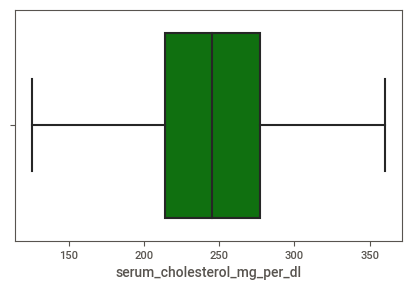

In [ ]:
## check ,are there any outliers in serum_cholesterol_mg_per_dl
plt.figure(figsize=(5,3))
sns.boxplot(x='serum_cholesterol_mg_per_dl',data=data,color='green')
plt.show()

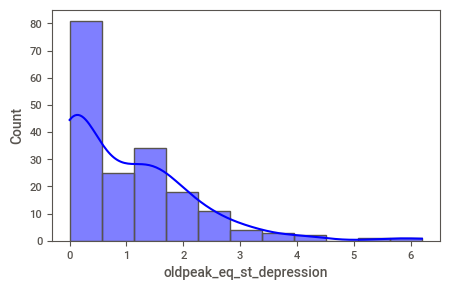

In [ ]:
# check distribution of oldpeak_eq_st_depression
plt.figure(figsize=(5,3))
sns.histplot(data=data,x='oldpeak_eq_st_depression',kde=True,color='blue')
plt.show()

In [ ]:
# Handle outliers of oldpeak_eq_st_depression
## Find Q1 and Q3
Q1=data['oldpeak_eq_st_depression'].quantile(0.25)
Q3=data['oldpeak_eq_st_depression'].quantile(0.75)
print('lower quartile',Q1)
print('upper quartile',Q3)

lower quartile 0.0
upper quartile 1.6


In [ ]:
## find IQR
IQR=Q3-Q1
IQR

1.6

In [ ]:
## find lower limit and upper limit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -2.4000000000000004
upper limit is 4.0


In [ ]:
## find percentage of outliers
len(data.loc[data['oldpeak_eq_st_depression']>upper_limit])/len(data)*100

2.2222222222222223

In [ ]:
## find values above upper limit
data.loc[data['oldpeak_eq_st_depression']>upper_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target
4,oyt4ek,3,1,130,3,0,0,2,270.0,4.2,1,59,145,0
112,6r9x2j,2,1,140,4,0,0,0,298.0,4.2,1,51,122,1
140,noxsnw,3,1,140,4,0,0,0,217.0,5.6,1,55,111,1
162,usnkhx,3,1,160,4,0,0,2,164.0,6.2,0,62,145,0


In [ ]:
## find values below lower limit
data.loc[data['oldpeak_eq_st_depression']<lower_limit]

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,target


In [ ]:
## how to handle outliers
## since data is not normal,we will replace outliers with median
data.loc[data['oldpeak_eq_st_depression']>upper_limit,'oldpeak_eq_st_depression']=data['oldpeak_eq_st_depression'].median()

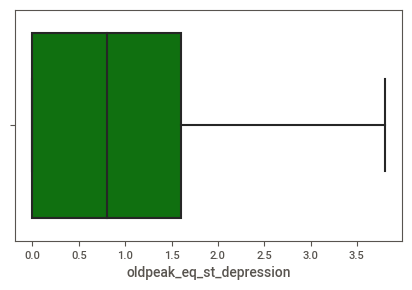

In [ ]:
## check ,are there any outliers in oldpeak_eq_st_depression
plt.figure(figsize=(5,3))
sns.boxplot(x='oldpeak_eq_st_depression',data=data,color='green')
plt.show()

In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
df=['patient_id','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ecg_results','sex','target']
data1=scaling.fit_transform(data.drop(df,axis=1))
print(data1)

[[0.44736842 0.77777778 0.         0.33333333 0.69811321]
 [0.21052632 0.37606838 0.42105263 0.52083333 0.58490566]
 [0.40789474 0.76068376 0.         1.         0.62264151]
 [0.76315789 0.41452991 0.         0.22916667 0.80188679]
 [0.47368421 0.61538462 0.21052632 0.625      0.46226415]
 [0.47368421 0.23076923 0.         0.27083333 0.50943396]
 [0.73684211 0.56410256 0.68421053 0.64583333 0.5754717 ]
 [0.73684211 0.64102564 0.15789474 0.58333333 0.1509434 ]
 [1.         0.85470085 0.89473684 0.625      0.41509434]
 [0.34210526 0.3974359  0.42105263 0.4375     0.58490566]
 [0.34210526 0.75213675 0.10526316 0.77083333 0.51886792]
 [0.60526316 0.42735043 0.         0.27083333 0.77358491]
 [0.60526316 0.89316239 0.         0.72916667 0.58490566]
 [0.57894737 0.47008547 0.05263158 0.33333333 0.52830189]
 [0.34210526 0.44871795 1.         0.1875     0.81132075]
 [0.65789474 0.31623932 0.23684211 0.4375     0.28301887]
 [0.47368421 0.46153846 0.15789474 0.33333333 0.74528302]
 [0.47368421 0

In [ ]:
data2=pd.DataFrame(data1,columns=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','age','max_heart_rate_achieved'])
data2


,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,0.447368,0.777778,0.000000,0.333333,0.698113
1,0.210526,0.376068,0.421053,0.520833,0.584906
2,0.407895,0.760684,0.000000,1.000000,0.622642
3,0.763158,0.414530,0.000000,0.229167,0.801887
4,0.473684,0.615385,0.210526,0.625000,0.462264
...,...,...,...,...,...
175,0.407895,0.547009,0.052632,0.791667,0.632075
176,0.473684,0.858974,0.894737,0.541667,0.198113
177,0.407895,0.782051,0.473684,0.729167,0.330189
178,0.394737,0.551282,0.000000,0.395833,0.745283


In [ ]:
df1=data[['patient_id','slope_of_peak_exercise_st_segment','thal','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ecg_results','sex','target']]
new_data=pd.concat([data2,df1],axis=1)  # concat two columns
new_data

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,patient_id,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,sex,target
0,0.447368,0.777778,0.000000,0.333333,0.698113,0z64un,1,2,2,0,0,2,1,0
1,0.210526,0.376068,0.421053,0.520833,0.584906,ryoo3j,2,2,3,0,0,0,0,0
2,0.407895,0.760684,0.000000,1.000000,0.622642,yt1s1x,1,2,4,0,0,2,1,1
3,0.763158,0.414530,0.000000,0.229167,0.801887,l2xjde,1,1,4,0,0,0,1,0
4,0.473684,0.615385,0.210526,0.625000,0.462264,oyt4ek,3,1,3,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.407895,0.547009,0.052632,0.791667,0.632075,5qfar3,2,1,4,2,1,0,1,0
176,0.473684,0.858974,0.894737,0.541667,0.198113,2s2b1f,2,2,4,0,0,1,0,1
177,0.407895,0.782051,0.473684,0.729167,0.330189,nsd00i,2,1,3,0,0,0,1,1
178,0.394737,0.551282,0.000000,0.395833,0.745283,0xw93k,1,2,3,2,1,0,1,0


# Feature Selection

## dropping unwanted variable

In [ ]:
new_data.drop('patient_id',axis=1,inplace=True)  # drop patient_id column

In [ ]:
new_data.head(2)

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved,slope_of_peak_exercise_st_segment,thal,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ecg_results,sex,target
0,0.447368,0.777778,0.000000,0.333333,0.698113,1,2,2,0,0,2,1,0
1,0.210526,0.376068,0.421053,0.520833,0.584906,2,2,3,0,0,0,0,0


## Find correlation

<Axes: >

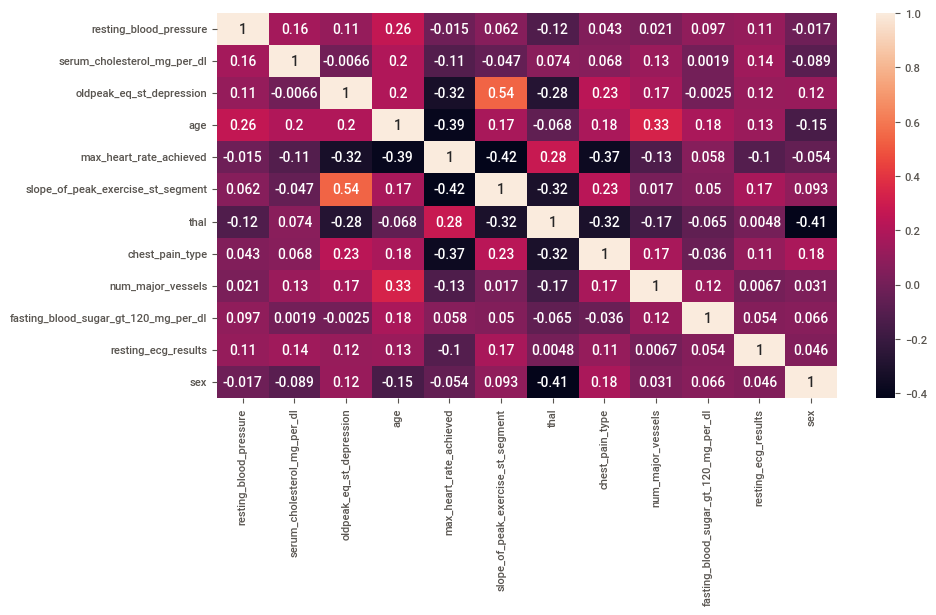

In [ ]:
# check for multicollinearity
plt.figure(figsize=(10,5))
new_data.corr()
sns.heatmap(new_data.drop('target',axis=1).corr(),annot=True)

# Model Creation

## Logistic Regression

In [ ]:
# split data into x and y
x=new_data.drop('target',axis=1)
y=new_data.target

In [ ]:
## Split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
x_train.shape

(126, 12)

In [ ]:
x_test.shape

(54, 12)

In [ ]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [ ]:
# initialize the model
model_1=LogisticRegression()

In [ ]:
# train model with x_train,y_train
model_1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# make prediction using x_test
y_pred=model_1.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[36,  5],
       [ 6,  7]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7962962962962963

In [ ]:
precision_score(y_test,y_pred)

0.5833333333333334

In [ ]:
recall_score(y_test,y_pred)

0.5384615384615384

In [ ]:
f1_score(y_test,y_pred)

0.5599999999999999

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        41
           1       0.58      0.54      0.56        13

    accuracy                           0.80        54
   macro avg       0.72      0.71      0.71        54
weighted avg       0.79      0.80      0.79        54



In [ ]:
# ROC-AUC Method
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,y_pred)
roc_auc_score=auc(false_positive_rate,true_positive_rate)
print(roc_auc_score) # since roc_auc score is near to 1,we say its good model

0.7082551594746717


In [ ]:
# do the prediction by putting values of each column
model_1.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column, the logistic regression model is predicted that there is no heart disease.

## SVM

In [ ]:
# split data into x and y
x=new_data.drop('target',axis=1)
y=new_data['target']

In [ ]:
## Creating training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
# Balancing the data

new_data.target.value_counts()

0    123
1     57
Name: target, dtype: int64

In [ ]:
!pip install imblearn

In [ ]:
## Data is imbalanced and will balance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [ ]:
#smote is always applied on train data(x_train and y_train)
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [ ]:
# Counter is a container which keeps track to how many times equivalent values are added.
#Python counter collections module and is a subclass of dictionary

from collections import Counter
print('Actual classes',Counter(y_train))
print('SMOTE classes',Counter(y_smote))

Actual classes Counter({0: 82, 1: 44})
SMOTE classes Counter({0: 82, 1: 82})


In [ ]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier=SVC()
svclassifier.fit(x_smote,y_smote)

SVC()

In [ ]:
y_pred=svclassifier.predict(x_test)

In [ ]:
# Evaluating the model created

from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_pred)
acc

0.7222222222222222

In [ ]:
f1_score(y_test,y_pred)

0.5454545454545455

In [ ]:
# Classification report measures the quality of predictions.True Positive,False Positive,True Negative,False Negative
# are used to predict the metrics of a classification report.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        41
           1       0.45      0.69      0.55        13

    accuracy                           0.72        54
   macro avg       0.67      0.71      0.67        54
weighted avg       0.78      0.72      0.74        54



In [ ]:
# Checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
scores

array([0.53846154, 0.42857143, 0.48484848])

In [ ]:
print('cross validation score',scores.mean())

cross validation score 0.4839604839604839


In [ ]:
print('Standard deviation',scores.std())

#std<0.05,then model is good otherwise bad model

Standard deviation 0.044866843526877205


In [ ]:
# Hyper parameter Tuning
##gridsearch CV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define hyper parameter range
param_grid={'C':[0.1,5,10,25,45,60,70],'gamma':[1,0.1,0.01,0.001,0.001],'random_state':list(range(1,20))}
model_2=SVC()
grid=GridSearchCV(model_2,param_grid,verbose=1,scoring='f1',cv=5)
grid.fit(x,y)

Fitting 5 folds for each of 665 candidates, totalling 3325 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 25, 45, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=1)

In [ ]:
print(grid.best_params_)

{'C': 25, 'gamma': 0.1, 'random_state': 1}


In [ ]:
model_2=SVC(C=25,gamma=0.1,random_state=1)

In [ ]:
model_2.fit(x_smote,y_smote)

SVC(C=25, gamma=0.1, random_state=1)

In [ ]:
y_pred=model_2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7407407407407407

In [ ]:
f1_score(y_test,y_pred)

0.5333333333333333

In [ ]:
# do the prediction by putting values of each column
grid.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column, the SVM model is predicted that there is no heart disease.

## Decision Tree

In [ ]:
# Split data into x and y
x = new_data.drop('target', axis=1)
y = new_data.target

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# Balacing the data using SMOTE
from imblearn.over_sampling import SMOTE #for balancing the data

sm = SMOTE()

x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [ ]:
# count of each label
from collections import Counter# importing counter to check count of each label

In [ ]:
print("actual",Counter(y_train))
print("after smote",Counter(y_smote))


actual Counter({0: 97, 1: 47})
after smote Counter({0: 97, 1: 97})


In [ ]:
# Import the algorithm and train the model
from sklearn.tree import DecisionTreeClassifier

model_3=DecisionTreeClassifier()

model_3.fit(x_smote,y_smote)

DecisionTreeClassifier()

In [ ]:
# Predictions -- x_test (unknown or new records to the model)
y_pred=model_3.predict(x_test)

In [ ]:
# Predictions with x train (the known records)
y_train_predict=model_3.predict(x_train)   #predicting training data to check training performance

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [ ]:
# training accuracy

accuracy_score(y_train,y_train_predict) # Here , Training accuracy is 1.0 meaning 100% accuracy

1.0

In [ ]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.6388888888888888

Here , it is nearly 64%

meaning our training score is high , but out testing score is low -> situation is called as overfitting

Our next task is to overcome this overfitting.So we apply hyperparameter tuning.

## Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
# Applying the Grid Search CV

dtc = DecisionTreeClassifier(random_state=3)
grid_2= GridSearchCV(dtc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
grid_2.fit(x_smote,y_smote)
best_params = grid_2.best_params_
print(grid_2.best_params_)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


In [ ]:
grid_2.best_score_

0.7575320512820513

In [ ]:
model_3=DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=1,
                             min_samples_split=2, splitter='random')
model_3.fit(x_smote,y_smote) #training the model
y_pred=model_3.predict(x_test) #prediction
y_pred #predicted values


array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
y_train_predict=model_3.predict(x_smote)#predicting training data to check training performance
y_train_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.6944444444444444

In [ ]:
# Training score
accuracy_score(y_smote,y_train_predict)

0.9278350515463918

In [ ]:
# do the prediction by putting values of each column
grid_2.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column, the decision tree model is predicted that there is no heart disease.

After apply hyperparameter tuning the testing score is better than training score as compared to the previous score.

## Random Forest

In [ ]:
# Split data into x and y
x = new_data.drop('target', axis=1)
y = new_data.target

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_4=RandomForestClassifier()
model_4.fit(x_smote,y_smote)
y_pred=model_4.predict(x_test)

In [ ]:
# Testing accuracy
accuracy_score(y_test,y_pred)

0.9444444444444444

In [ ]:
#TRAINING ACCURACY
y_pred_train = model_4.predict(x_train)

In [ ]:
accuracy_score(y_train,y_pred_train)

0.9583333333333334

Here , it is 94%

meaning our training score is high i.e 96% , but our testing score is low -> situation is called as overfitting

Our next task is to overcome this overfitting.So we apply hyperparameter tuning.

# Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=1400, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [ ]:
# dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)    # model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(x_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf= 1, max_features='sqrt', max_depth=50, bootstrap=True) # passing best parameter to randomforest
rf_clf2.fit(x_smote,y_smote)
y_predict=rf_clf2.predict(x_test)

In [ ]:
# training accuracy
y_train_pred=rf_clf2.predict(x_train)

In [ ]:
# testing accuracy
accuracy_score(y_test,y_predict)


0.9722222222222222

In [ ]:
# training accuracy
accuracy_score(y_train,y_train_pred)

0.9513888888888888

In [ ]:
# do the prediction by putting values of each column
rf_cv.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column, the random forest model is predicted that there is no heart disease.

After applying hyperparameter tuning,the score comes best.Here the testing score is more than training score.

# Bagging

In [ ]:
# Split data into x and y
x = new_data.drop('target', axis=1)
y = new_data.target

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier(base_estimator=model_1,n_estimators=200)
model_bag.fit(x_smote,y_smote)
y_pred=model_bag.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [ ]:
# do the prediction by putting values of each column
model_bag.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column, the Bagging model is predicted that there is no heart disease.

# KNN

In [ ]:
# Split data into x and y
x = new_data.drop('target', axis=1)
y = new_data.target

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=2)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6944444444444444

In [ ]:
# how to select k value
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_smote,y_smote)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))

In [ ]:
error_rate

[0.2777777777777778,
 0.3055555555555556,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.2777777777777778,
 0.3055555555555556,
 0.25,
 0.3055555555555556,
 0.2222222222222222]

Text(0.5, 1.0, 'k v/s error')

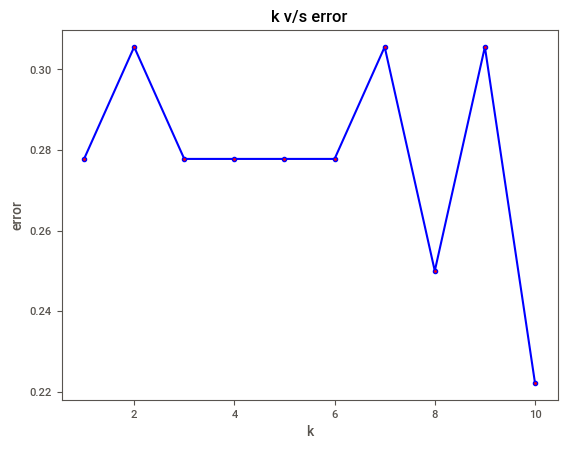

In [ ]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_smote,y_smote)
y_pred=KNN.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7777777777777778

In [ ]:
# do the prediction by putting values of each column
KNN.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column, the KNN model is predicted that there is no heart disease.

# Boosting

In [ ]:
# Split data into x and y
x = new_data.drop('target', axis=1)
y = new_data.target

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GB=GradientBoostingClassifier(n_estimators=100)
GB.fit(x_train,y_train)
y_pred=GB.predict(x_test)

In [ ]:
GB.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=GB.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
accuracy_score(y_test,y_pred)

0.75

In [ ]:
f1_score(y_test,y_pred)

0.30769230769230765

In [ ]:
# do the prediction by putting values of each column
GB.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

# XG BOOST

In [ ]:
# Split data into x and y
x = new_data.drop('target', axis=1)
y = new_data.target

In [ ]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=4)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
model_5=XGBClassifier()
model_5.fit(x_train,y_train)
accuracy_score(y_test,y_pred)

0.75

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid={'gamma':[0.01,0.2,0.4,0.8,0.1,2,101.2,42.5],
           'learning_rate':[0.01,0.02,0.04,0.18,0.28],
           'max_depth':[4,8,5,6,9,12,15,20,22,24],
           'n_estimators':[25,56,45,89,125,250,450,280],
           'reg_alpha':[0,0.1,0.4,0.2,0.6,0.8,12.5,8.5],
           'reg_lambda':[0,0.1,0.2,0.4,0.8,1.8,6.5,8.25,4.8]}

In [ ]:
XGB=XGBClassifier(random_state=42,verbosity=0)

In [ ]:
rcv=RandomizedSearchCV(estimator=XGB,scoring='f1',param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.2, 0.4, 0.8, 0.1, 2,
                                                  101.2, 42.5],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.18, 0.28],
                                        'max_depth': [4, 8, 5, 6, 9, 12, 15, 20,
                                                      22, 24],
                                        'n_estimators': [25, 56, 45, 89, 125,
                                                         250, 450, 280],
                                        'reg_alpha': [0, 0.1, 0.4, 0.2, 0.6,
                                                      0.8, 12.5, 8.5],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.8, 6.5, 8.25, 4.8]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
cv_best_params=rcv.best_params_
print(f'best parameters:{cv_best_params}')

best parameters:{'reg_lambda': 0.4, 'reg_alpha': 0.6, 'n_estimators': 450, 'max_depth': 20, 'learning_rate': 0.04, 'gamma': 0.01}


In [ ]:
XGB_model=XGBClassifier(reg_lambda= 0.4, reg_alpha=0.6, n_estimators=450, max_depth=20, learning_rate=0.04, gamma=0.01)
XGB_model.fit(x_train,y_train)
y_predict=XGB_model.predict(x_test)

In [ ]:
y_train_pred=XGB_model.predict(x_train)

In [ ]:
accuracy_score(y_test,y_predict)

0.8055555555555556

In [ ]:
# do the prediction by putting values of each column
rcv.predict([[0.55,0.82,0.42,0.44,0.81,2,2,2,0,0,2,1]])

array([0])

After entering value for each column the XG BOOST model is predicted that there is no heart disease.

# Model Comparision

1.  Logistic Regression

*   accuracy_score-0.7962 i.e 79%
2. SVM

*  accuracy_score-0.72222 i.e 72%

 After hyperparameter tuning


*   accuracy_score-0.7407 i.e 74%

3. Decision Tree

*  Training accuracy score-1.0 i.e 100%
*  Testing accuracy score-0.6388 i.e 64%

 After hyperparameter tuning

*  Training accuracy score-0.9278 i.e 92%
*  Testing accuracy score-0.6944 i.e 69%

4. Random Forest

*   Training accuracy score-0.9583 i.e 95%
*   Testing accuracy score-0.9444 i.e 94%

 After hyperparameter tuning

*  Training accuracy score-0.9513 i.e 95%
*  Testing accuracy score-0.9722 i.e 97%

5. Bagging

*   accuracy_score-0.6666 i.e 66%

6. KNN

*  accuracy_score-0.7777 i.e 77%

7. Boosting

*  accuracy_score-0.75 i.e 75%

8. XGBoost

*  accuracy_score-0.75 i.e 75%

 After hyperparameter tuning

*  accuracy_score-0.8055 i.e 80%

From all the model,Random Forest score is best which is 97% and there is no overfitting means the random forest model is the best model.























# Challenges faced on data

*   The dataset is based on health care sector.Since we are not from medical background some words was difficult to understand and hence to write insights for EDA was difficult.
*   All categorical column have only the numerical codes but what it actually represent it was not available.So analysing the graph was difficult.For that we had give effort to explore.

# Technique used to solve the problem

*  We were searched it in google and tried hard to understand the meaning of each word.



